Numerical integration is needed when you're working with nonlinear equations, as opposed to using a Laplace transform with Linear ODEs

In [1]:
def rk4(y,x,dx,f):
    """4th order runge-kutta for dy/dx
    y: init value of y
    x: init value of x
    dx: time timestep of x
    f: callable function in terms of (y,x)
    to compute dy/dx
    """
    
    k1 = dx * f(y, x)
    k2 = dx * f(y + 0.5*k1, x + 0.5*dx)
    k3 = dx * f(y + 0.5*k2, x + 0.5*dx)
    k4 = dx * f(y + k3, x + dx)
    
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6.
    

max error 0.00005


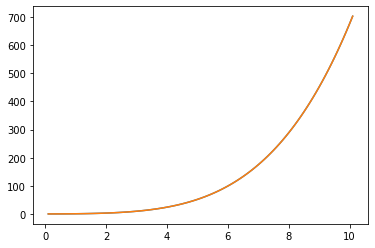

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
t = 0.0
y = 1.0
dt = 0.1

ys,time = [],[]

def function(y,t):
    return t*math.sqrt(y)

while t <= 10:
    y = rk4(y,t,dt,function)
    t += dt
    ys.append(y)
    time.append(t)
    
    
exact = [(t**2 + 4)**2 / 16. for t in time]
plt.plot(time, ys)
plt.plot(time, exact)

error = np.array(exact) - np.array(ys)
print("max error {:.5f}".format(max(error)))